<a href="https://colab.research.google.com/github/spqjf12345/NLP-TIL/blob/main/7_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#인공 신경망
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


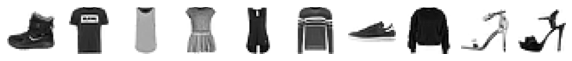

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()

In [13]:
#target 값
#각 target 당 6000개의 샘플
print([train_target[i] for i in range(10)])

import numpy as np
print(np.unique(train_target, return_counts=True))

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [14]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [15]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [22]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
#모델 만들기
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

#밀집 층
#뉴런의 개수 10 -> 뉴런 출력에 적용할 함수 -> 입력의 크기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)

#설정 compile
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# 다중 분류시 categorical_crossentropy
# 이진 분류시 binary_crossentropy
model.fit(train_scaled, train_target, epochs = 5)

#모델 평가 evaluate
model.evaluate(val_scaled, val_target)

(15728, 784) (15728,)
(3932, 784) (3932,)
Epoch 1/5
492/492 [==============================] - 1s 1ms/step - loss: 0.7638 - accuracy: 0.7408
Epoch 2/5
492/492 [==============================] - 1s 1ms/step - loss: 0.5440 - accuracy: 0.8136
Epoch 3/5
492/492 [==============================] - 1s 1ms/step - loss: 0.5005 - accuracy: 0.8292
Epoch 4/5
492/492 [==============================] - 1s 2ms/step - loss: 0.4780 - accuracy: 0.8389
Epoch 5/5
123/123 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.8296


[0.49178168177604675, 0.8296032547950745]

In [27]:
#심층 신경망 07-2
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

#모든 신경망의 은닉층에는 활성화 함수가 있다
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([dense1, dense2])
model.summary()

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')
model.summary()

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
___

In [30]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))
model.summary()

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
#one hot encoding이 아닐 시 sparse_categorical_crossentropy를 사용한다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

model.compile(optimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
sgd = keras.optimizers.SGD()
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics='accuracy')
sgd = keras.optimizers.SGD(learning_rate=0.1)
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

model.evaluate(val_scaled, val_target)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
Total params: 88,600
Trainable params: 88,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5588 - accuracy: 0.8062
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3987 - accuracy: 0.8575
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3591 - accuracy: 0.8715
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0

[0.34941723942756653, 0.8701666593551636]

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


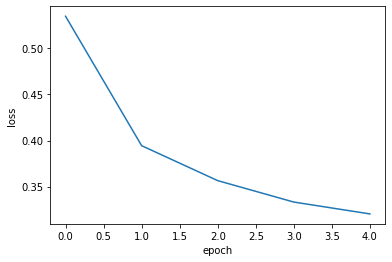

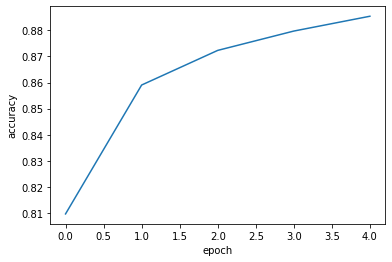

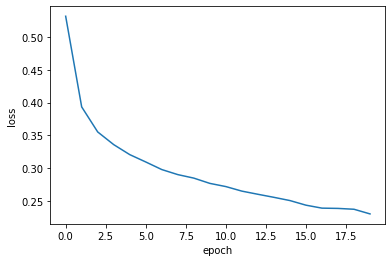

In [38]:
#07-3 신경망 모델 훈련
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model
model = model_fn()
model.summary()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
print(history.history.keys())

import matplotlib.pyplot as plt
#손실도
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi=300)
plt.show()

#정확도 
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi=300)
plt.show()

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-03', dpi=300)
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


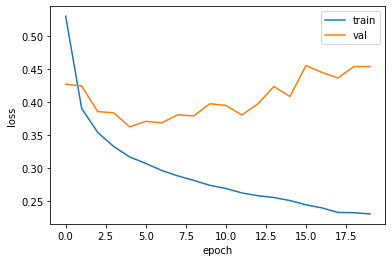

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


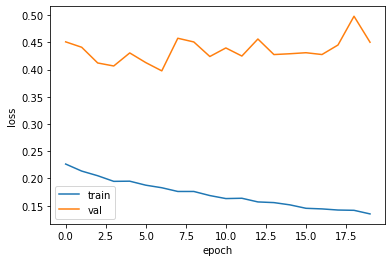

In [40]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi=300)
plt.show()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


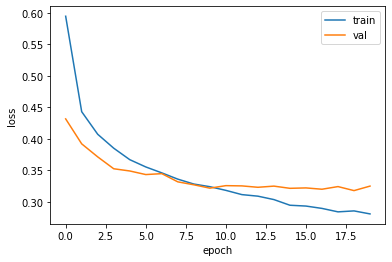

In [42]:
#dropout -> 일부 뉴런을 랜덤하게 끄기
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()

In [43]:
#모델 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))
model.save_weights('model-weight.h5') #파라미터 저장
model.save('model-whole.h5') #모델 구조와 파라미터 저장
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Sep  9 15:15 model-weight.h5
-rw-r--r-- 1 root root 981736 Sep  9 15:15 model-whole.h5


In [48]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weight.h5')

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

0.8816666666666667
375/375 [==============================] - 1s 1ms/step - loss: 0.3239 - accuracy: 0.8817


[0.32385537028312683, 0.8816666603088379]

In [49]:
#call-back
#최상의 모델 자동으로 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

#epochs가 커져 과대 적합 되는 것을 방지하기 위한 조기 종료 - EarlyStopping
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

375/375 [==============================] - 1s 2ms/step - loss: 0.3190 - accuracy: 0.8891


7


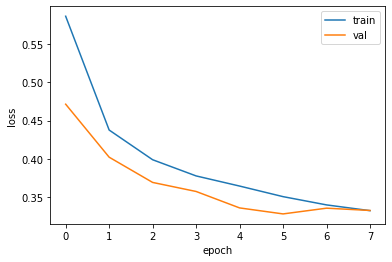

375/375 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8797


[0.3277983069419861, 0.8796666860580444]

In [50]:
#종료된 epoch 번
print(early_stopping_cb.stopped_epoch)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()

model.evaluate(val_scaled, val_target)